# Hate Speech Detection

## Dataset
Our Dataset Has **6 classes**. **Political, Geopolitical, Gender, Religious, Personal, Sports**. These Dataset was created by merging some existing Open source Bengali Hate Speech Datsets. Initialy we have merge 5 Dataset. There was almost 35% duplicate value there. We drop the duplicate value. Remaining was 35k. After proper labeling, we also collected data from Facebook, labeled them, and added them. Finally, unique data is **29.3k**.



For loading data

In [ ]:
!pip install requests

We upload our dataset to Github to load it. Run this cell for read data

In [ ]:
import pandas as pd
import io
import requests
# df = pd.read_csv("https://github.com/Mahbubur-Rahman-15/Hate-Speech-Dataset/blob/main/H_Data_processed.csv")
# url = "https://github.com/Mahbubur-Rahman-15/Hate-Speech-Dataset/blob/main/H_Data_processed.csv"
# Update the URL to the raw CSV data
url = "https://raw.githubusercontent.com/Mahbubur-Rahman-15/Hate-Speech-Dataset/main/H_Data_processed.csv"
response = requests.get(url)
response.raise_for_status()  # Raise an exception if the request fails

# Read the CSV content into a Pandas DataFrame
df = pd.read_csv(io.StringIO(response.text))

Statistics of our dataset.

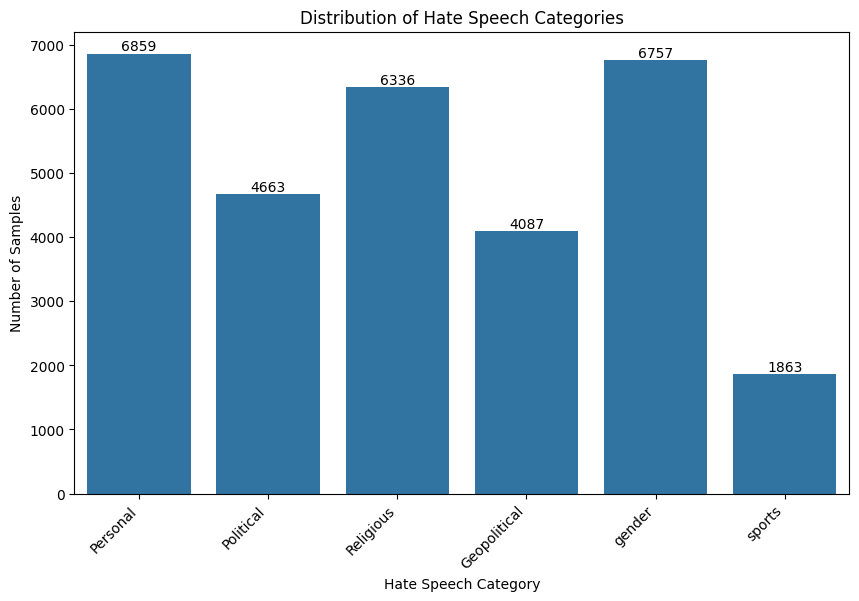

In [ ]:
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df) # Assuming 'label' column holds the class labels
plt.title('Distribution of Hate Speech Categories')
plt.xlabel('Hate Speech Category')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add integer labels to the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.show()

In [ ]:
print(df.describe())
print(df.info())

                            text     label cleaned_text
count                      30565     30565        30565
unique                     30565         6        29338
top     তোদের মতো দালাল তো আর না  Personal         মাগি
freq                           1      6859           10
<class 'pandas.core.frame.DataFrame'>
Index: 30565 entries, 0 to 31242
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          30565 non-null  object
 1   label         30565 non-null  object
 2   cleaned_text  30565 non-null  object
dtypes: object(3)
memory usage: 955.2+ KB
None


Label wise data count

In [ ]:
df['label'].value_counts()

,count
label,
Personal,7000
gender,6793
Religious,6468
Political,4790
Geopolitical,4330
sports,1865


Drop duplicate data.

In [ ]:
# Check for duplicates in the 'text' column
duplicates = df[df.duplicated(subset=['text'], keep=False)]

if not duplicates.empty:
  print("Duplicate rows found in 'text' column:")
  print(duplicates)

  # Drop duplicate rows based on the 'text' column, keeping the first occurrence
  df = df.drop_duplicates(subset=['text'], keep='first')
  print("\nDuplicate rows dropped. New DataFrame:")
  print(df.head()) # Display the first few rows of the updated DataFrame
else:
  print("No duplicate rows found in 'text' column.")

Duplicate rows found in 'text' column:
                                                    text         label  \
68     পাপিয়াসাবরীনামিথিলাসকল বারোভাতারী পক্ষ থেকে অভ...      Personal   
163    ভাই তোমাকে বলছি তুমি রানু দিয়ে নিয়ে কোন ভিডি...      Personal   
215    মাগি আগের থেকেই বাধাই রাখছে আর কই পরের মাসেই ব...      Personal   
236    কি যে ওর কন্ঠ সুর শুনলে পাড়েই বমি আসে হিমেশের...      Personal   
241             সুচনার প্রথমেই সুচি কে ফাসিতে ঝুলানো হউক      Personal   
...                                                  ...           ...   
31236     জনের হোগা মারছে কৃশ্ন  জনের নাম কি তার মনে আছে     Religious   
31241  অক্টোবর  আওয়ামী হায়েনাদের নৃশংসতায় কেঁদেছে মান...  Geopolitical   
31243  মে রোববার মধ্যরাতে গুলিবিদ্ধ অবস্থায় পড়ে আছে দ...     Religious   
31244          দেখিনি আজ আওয়ামীলীগের শাসনামলে  অনুভব করি  Geopolitical   
31245  সালে আমরা স্বাধীনতার জন্যে যুদ্ধ করলেও ভারত কর...  Geopolitical   

                                            cleaned_text  text_length  


Label-wise data count after dropping duplicate text. We can see that our dataset is imbalanced. Which may lead to a decrease in performance.

In [ ]:
df['label'].value_counts()

,count
label,
Personal,6859
gender,6757
Religious,6336
Political,4663
Geopolitical,4087
sports,1863


5 Sample from the dataset. We have remove some stop words while creating the dataset and store them in separate column name cleaned_text

In [ ]:
df.sample(5)

,text,label,cleaned_text
2796,ওর মত জানোয়ারের বেচে থাকার কোনো অধিকারই নাই।ওক...,Personal,ওর মত জানোয়ারের বেচে থাকার কোনো অধিকারই নাই।ওক...
2931,বিচারক নির্বাচন করার আগে তাদের দক্ষতা আচরন দুর...,Personal,বিচারক নির্বাচন আগে দক্ষতা আচরন দুরদর্শীতা মার...
27037,তুই একটা খানকির পোলা,gender,তুই খানকির পোলা
9557,এখন দেখবেন বাংলাদেশের চেয়ে বেশি মুক্তি যোদ্দা ...,Geopolitical,এখন দেখবেন বাংলাদেশের চেয়ে বেশি মুক্তি যোদ্দা ...
19337,এই মাদারি একটা হিজড়া আগামীবার সে সেন্টার পয়ে...,Political,মাদারি হিজড়া আগামীবার সেন্টার পয়েন্টে স্ট্রো...


## Data preprocessing
Text clean and emoji conversion did not use here as we previously done that while creating the dataset. Tokenize the dataset for mBERT and save it for later use. Also Label converted to numeric value.

In [ ]:
import pandas as pd
import re
# from emoji import demojize
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer

# Load mBERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")

# 1. Emoji Replacement
# def replace_emojis_with_text(text):
#     text = demojize(text, delimiters=(" ", " "))  # 😊 → smiling face
#     text = re.sub(r":", "", text)  # Remove colons
#     return text

# # 2. Text Cleaning
# def clean_text(text):
#     text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Remove URLs
#     text = re.sub(r"\s+", " ", text).strip()  # Normalize spaces
#     return text

# 3. Preprocessing Pipeline for Text
# def preprocess_text(text):
#     text = replace_emojis_with_text(text)
#     text = clean_text(text)
#     return text

# 4. Tokenization for mBERT
def tokenize_text(text, tokenizer, max_length):
    encoded = tokenizer.encode_plus(
        text,
        add_special_tokens=True,  # Add [CLS] and [SEP]
        max_length=max_length,    # Truncate to max length
        padding="max_length",     # Pad to max length
        truncation=True,          # Truncate if needed
        return_tensors="pt"       # Return PyTorch tensors
    )
    return encoded["input_ids"].squeeze(0).tolist(), encoded["attention_mask"].squeeze(0).tolist()

# df = pd.read_csv("/content/drive/MyDrive/MScCS/Datasets/Modified/final_merged_dataset_no_duplicates.csv")
# df = df_balanced
# Preprocess the text column
# df["text"] = df["text"].apply(preprocess_text)

max_length = 128
df["input_ids"], df["attention_mask"] = zip(*df["cleaned_text"].apply(lambda x: tokenize_text(x, tokenizer, max_length)))

# Encode string labels to numerical values
label_encoder = LabelEncoder()
df["label_encoded"] = label_encoder.fit_transform(df["label"])

# Save the processed dataset and label encoder
df.to_csv("processed_hate_speech_dataset.csv", index=False)

# Save the label encoder for future use
import pickle
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

print("Preprocessing completed. Processed dataset saved as 'processed_hate_speech_dataset.csv'.")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

Preprocessing completed. Processed dataset saved as 'processed_hate_speech_dataset.csv'.


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

DataFrame into a PyTorch dataset

In [ ]:
class HateSpeechDataset(Dataset):
    def __init__(self, dataframe):
        """
        Args:
            dataframe (pd.DataFrame): DataFrame containing input_ids, attention_mask, and labels.
        """
        self.input_ids = dataframe["input_ids"].tolist()
        self.attention_mask = dataframe["attention_mask"].tolist()
        self.labels = dataframe["label_encoded"].tolist()

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        """
        Returns a dictionary with input_ids, attention_mask, and label.
        """
        input_ids = torch.tensor(self.input_ids[idx], dtype=torch.long)
        attention_mask = torch.tensor(self.attention_mask[idx], dtype=torch.long)
        label = torch.tensor(self.labels[idx], dtype=torch.long)

        return {
            "input_ids": input_ids,
            "attention_mask": attention_mask,
            "label": label
        }


Loading the preprocessed dataset

In [ ]:
import ast

# Load the processed dataset
df = pd.read_csv("processed_hate_speech_dataset.csv")

# Convert string representations of lists back to Python lists
df["input_ids"] = df["input_ids"].apply(ast.literal_eval)
df["attention_mask"] = df["attention_mask"].apply(ast.literal_eval)

# The labels should already be integers; if not, cast them
df["label_encoded"] = df["label_encoded"].astype(int)

print("Dataset loaded and fixed!")


Dataset loaded and fixed!


Split the data (80% train, 10% validation, 10% test)

In [ ]:
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=42) # Changed stratify parameter to temp_df['label']

print(f"Train size: {len(train_df)}")
print(f"Validation size: {len(val_df)}")
print(f"Test size: {len(test_df)}")

Train size: 24452
Validation size: 3056
Test size: 3057


Checking each dataset label wise count

In [ ]:
# prompt: train test label count

print(f"Train label counts:\n{train_df['label'].value_counts()}")
print(f"\nValidation label counts:\n{val_df['label'].value_counts()}")
print(f"\nTest label counts:\n{test_df['label'].value_counts()}")

Train label counts:
label
Personal        5487
gender          5406
Religious       5069
Political       3730
Geopolitical    3270
sports          1490
Name: count, dtype: int64

Validation label counts:
label
Personal        686
gender          675
Religious       633
Political       466
Geopolitical    409
sports          187
Name: count, dtype: int64

Test label counts:
label
Personal        686
gender          676
Religious       634
Political       467
Geopolitical    408
sports          186
Name: count, dtype: int64


PyTorch dataset, Batch size. Dataset to DataLoader

In [ ]:
# Create Dataset objects
train_dataset = HateSpeechDataset(train_df)
val_dataset = HateSpeechDataset(val_df)
test_dataset = HateSpeechDataset(test_df)

# Create DataLoaders
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
# Fetch a batch from the train DataLoader
batch = next(iter(train_loader))
print("Batch input_ids shape:", batch["input_ids"].shape)
print("Batch attention_mask shape:", batch["attention_mask"].shape)
print("Batch labels shape:", batch["label"].shape)

Batch input_ids shape: torch.Size([32, 128])
Batch attention_mask shape: torch.Size([32, 128])
Batch labels shape: torch.Size([32])


## Model
Downloading mBERT. As our number of class is 6, num_labels = 6

In [ ]:
from transformers import BertForSequenceClassification

# Load mBERT with the number of classes
num_labels = len(df["label_encoded"].unique())  # Number of unique labels
model = BertForSequenceClassification.from_pretrained(
    "bert-base-multilingual-cased",
    num_labels=num_labels
)


model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Adam optimizer. Learning rate is 5e-5. CrossEntropyLoss for loss.

In [ ]:
from transformers import AdamW
from torch.nn import CrossEntropyLoss

# Optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Loss function
criterion = CrossEntropyLoss()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Traing the model. Validation accuracy, F1, recall and precision. We use 5 epochs.Here Early stoping function does not use.

Epoch 1/5, Training Loss: 1.152055532636206
Epoch 1/5, Validation Loss: 0.9827400216211876, Validation Accuracy: 0.6639397905759162
Epoch 2/5, Training Loss: 0.8830250744726144
Epoch 2/5, Validation Loss: 0.9082290803392729, Validation Accuracy: 0.6927356020942408
Epoch 3/5, Training Loss: 0.7774790730351716
Epoch 3/5, Validation Loss: 0.8344679934283098, Validation Accuracy: 0.7293848167539267
Epoch 4/5, Training Loss: 0.6924706072978724
Epoch 4/5, Validation Loss: 0.8666700646281242, Validation Accuracy: 0.7113874345549738
Epoch 5/5, Training Loss: 0.6138997001780404
Epoch 5/5, Validation Loss: 0.8154209349304438, Validation Accuracy: 0.7293848167539267


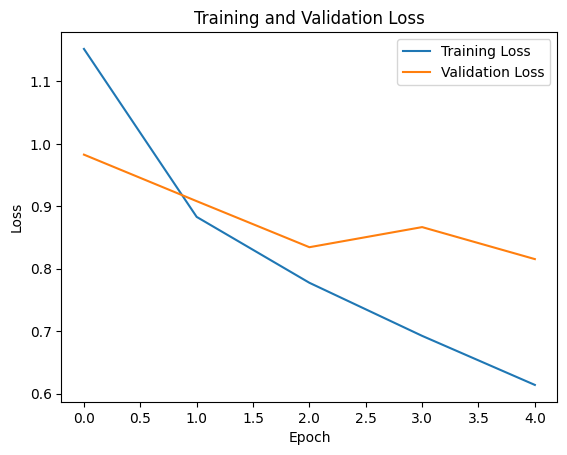

Validation Accuracy: 0.7293848167539267
Validation Precision: 0.7289824772156116
Validation Recall: 0.7293848167539267
Validation F1-score: 0.7272481414377037


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Training parameters
epochs = 5 # Adjust as needed
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop with validation
train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for batch in train_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))
    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_losses[-1]}")


    # Validation loop
    model.eval()
    val_loss = 0.0
    val_preds = []
    val_true = []
    with torch.no_grad():
        for batch in val_loader:
          input_ids = batch["input_ids"].to(device)
          attention_mask = batch["attention_mask"].to(device)
          labels = batch["label"].to(device)

          outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
          loss = outputs.loss
          val_loss += loss.item()

          logits = outputs.logits
          preds = torch.argmax(logits, dim=1).cpu().tolist()
          val_preds.extend(preds)
          val_true.extend(labels.cpu().tolist())


    val_losses.append(val_loss / len(val_loader))
    val_accuracy = accuracy_score(val_true, val_preds)
    val_accuracies.append(val_accuracy)
    print(f"Epoch {epoch + 1}/{epochs}, Validation Loss: {val_losses[-1]}, Validation Accuracy: {val_accuracy}")


# Plotting the training loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Calculate metrics
val_precision = precision_score(val_true, val_preds, average='weighted') # Use 'weighted' for multiclass
val_recall = recall_score(val_true, val_preds, average='weighted')
val_f1 = f1_score(val_true, val_preds, average='weighted')

print(f"Validation Accuracy: {val_accuracy}")
print(f"Validation Precision: {val_precision}")
print(f"Validation Recall: {val_recall}")
print(f"Validation F1-score: {val_f1}")


# Save the model
torch.save(model.state_dict(), "mbert_hate_speech_model.bin")

# Save performance metrics
performance = {
    'accuracy': val_accuracy,
    'precision': val_precision,
    'recall': val_recall,
    'f1': val_f1
}

with open('model_performance.txt', 'w') as f:
  for metric, value in performance.items():
    f.write(f"{metric}: {value}\n")

## Result
Confusion Matrix for test data and testing test dataset.

Test Accuracy: 0.7448478900883219
Test Precision: 0.7433441085356214
Test Recall: 0.7448478900883219
Test F1-score: 0.7420318005320222


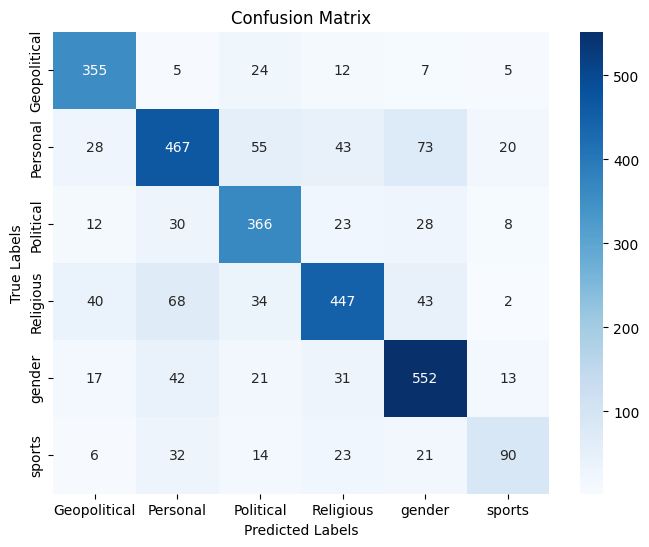

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Test loop
model.eval()
test_preds = []
test_true = []
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["label"].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().tolist()
        test_preds.extend(preds)
        test_true.extend(labels.cpu().tolist())

# Calculate metrics
test_accuracy = accuracy_score(test_true, test_preds)
test_precision = precision_score(test_true, test_preds, average='weighted')
test_recall = recall_score(test_true, test_preds, average='weighted')
test_f1 = f1_score(test_true, test_preds, average='weighted')

print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1-score: {test_f1}")

# Confusion Matrix
cm = confusion_matrix(test_true, test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

class-wise precision, recall, f1-score, support

In [ ]:
from sklearn.metrics import classification_report

# Calculate and print classification report
print(classification_report(test_true, test_preds, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

Geopolitical       0.78      0.87      0.82       408
    Personal       0.73      0.68      0.70       686
   Political       0.71      0.78      0.75       467
   Religious       0.77      0.71      0.74       634
      gender       0.76      0.82      0.79       676
      sports       0.65      0.48      0.56       186

    accuracy                           0.74      3057
   macro avg       0.73      0.72      0.72      3057
weighted avg       0.74      0.74      0.74      3057



sports class has poor performance as it is much smaller than other classes. Geopolitical has the highest performance. As its contextual meaning is different from other classes.